In [1]:
import pandas as pd

data = pd.read_csv("GDPlist.csv",encoding ="ISO-8859-1")
data.head()

,Country,Continent,GDP (millions of US$)
0,Afghanistan,Asia,18181
1,Albania,Europe,12847
2,Algeria,Africa,190709
3,Angola,Africa,100948
4,Argentina,South America,447644


In [2]:
data.info()

# Bộ dữ liệu chứa 3 cột và 125 hàng
# Country, Continent : object, mang tính định danh: norminal
# GDP: int64: ratio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                125 non-null    object
 1   Continent              125 non-null    object
 2   GDP (millions of US$)  125 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.1+ KB


GDP average: 555427.784
Error: 96089.0


Text(0, 0.5, 'No of countries')

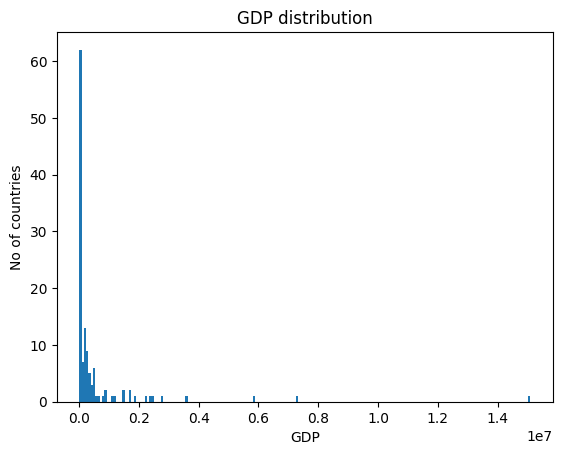

In [7]:
a = data["GDP (millions of US$)"]
print("GDP average: " + str(a.mean()))
print("Error: " + str(a.median()))
import matplotlib.pyplot as plt
plt.hist(a, bins = 200)
plt.title("GDP distribution")
plt.xlabel("GDP")
plt.ylabel("No of countries")

# GDP cua các quốc gia không đồng đều,
# 50% quốc gia có GDP <=96089.0 millions US$
# 50% quốc gia có GDP >96089.0 millions US$
# Giá trị trung bình = 555427.784 lớn hơn rất nhiều so với 96089.0 
# nên có một vài quốc gia có GDP lớn, khác biệt hoàn toàn với các quốc gia còn lại (14000000 millions US$)

In [18]:
country_list = data.groupby ("Continent")["Country"].count()
country_list.head()
#country_list.info()

Continent
Africa           29
Asia             36
Europe           37
North America    11
Oceania           3
Name: Country, dtype: int64

In [24]:
GDP_continent = data.groupby ("Continent")["Country","GDP (millions of US$)"].sum()
GDP_continent.head()

/var/folders/0g/n9l5s62d0wj2gkphqy_79b880000gn/T/ipykernel_2822/420965291.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  GDP_continent = data.groupby ("Continent")["Country","GDP (millions of US$)"].sum()
/var/folders/0g/n9l5s62d0wj2gkphqy_79b880000gn/T/ipykernel_2822/420965291.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  GDP_continent = data.groupby ("Continent")["Country","GDP (millions of US$)"].sum()


,GDP (millions of US$)
Continent,
Africa,1820811
Asia,24425891
Europe,19139380
North America,18238447
Oceania,1662727


In [22]:
GDP_continent = data.groupby (["Continent","Country"])["GDP (millions of US$)"].sum().sort_values(ascending= False)
GDP_continent.head(10)

Continent      Country        
North America   United States     15094025
Asia            China              7298147
                Japan              5869471
Europe          Germany            3577031
                France             2776324
South America   Brazil             2492908
Europe          United Kingdom     2417570
                Italy              2198730
Asia            Russia             1850401
North America   Canada             1736869
Name: GDP (millions of US$), dtype: int64